In [1]:
import pandas as pd
df = pd.read_json('../csv/acn_transfer.json')
df['connectionTime'] = pd.to_datetime(df['connectionTime'], format='mixed', utc=True)
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], format='mixed', utc=True)
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], format='mixed', utc=True)
xx = df['userInputs'].apply(lambda x:x[-1] if isinstance(x,list) and len(x)>0 else None)
flod  = pd.json_normalize(xx)
df = pd.concat([df,flod],axis=1)
df['requestedDeparture'] = pd.to_datetime(df['requestedDeparture'],format='mixed',utc=True)
df['modifiedAt'] = pd.to_datetime(df['modifiedAt'],format='mixed',utc=True)
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID,kmRequested,WhPerKM
0,5dd1f434f9af8b2dec178075,39,2019-11-01 18:11:18+00:00,2019-11-02 02:55:36+00:00,2019-11-02 01:16:41+00:00,14.101,2_39_78_360_2019-11-01 18:11:18.415605,2,CA-322,2-39-78-360,...,400.0,24.0,60.0,443.0,2019-11-01 18:11:28+00:00,True,2019-11-02 01:34:18+00:00,676.0,96.5604,248.549095
1,5dd1f434f9af8b2dec178076,39,2019-11-01 18:30:34+00:00,2019-11-01 22:15:42+00:00,2019-11-01 22:15:39+00:00,6.962,2_39_78_367_2019-11-01 18:30:33.896233,2,CA-494,2-39-78-367,...,375.0,15.0,40.0,378.0,2019-11-01 18:31:47+00:00,True,2019-11-02 00:48:34+00:00,3447.0,64.3736,233.014776
2,5dd1f434f9af8b2dec178077,39,2019-11-01 18:55:24+00:00,2019-11-01 19:33:16+00:00,2019-11-01 19:33:12+00:00,2.394,2_39_78_361_2019-11-01 18:55:23.831102,2,CA-493,2-39-78-361,...,400.0,36.0,90.0,311.0,2019-11-01 18:55:48+00:00,True,2019-11-02 00:06:24+00:00,832.0,144.8406,248.549095
3,5dd1f434f9af8b2dec178078,39,2019-11-01 19:10:30+00:00,2019-11-02 05:12:26+00:00,2019-11-01 20:15:26+00:00,2.160,2_39_123_23_2019-11-01 19:10:29.559896,2,CA-313,2-39-123-23,...,400.0,16.0,40.0,291.0,2019-11-01 19:10:57+00:00,True,2019-11-02 00:01:30+00:00,1082.0,64.3736,248.549095
4,5dd1f434f9af8b2dec178079,39,2019-11-01 19:44:41+00:00,2019-11-01 23:22:16+00:00,2019-11-01 22:20:49+00:00,6.756,2_39_78_366_2019-11-01 19:38:12.363403,2,CA-323,2-39-78-366,...,400.0,8.0,20.0,60.0,2019-11-01 19:44:41+00:00,True,2019-11-01 20:44:41+00:00,1124.0,32.1868,248.549095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,61550519f9af8b76960e169a,39,2021-09-13 21:12:53+00:00,2021-09-14 00:25:36+00:00,2021-09-13 21:41:31+00:00,2.285,2_39_89_25_2021-09-13 21:12:53.318460,2,CA-315,2-39-89-25,...,286.0,28.6,100.0,480.0,2021-09-13 21:13:32+00:00,True,2021-09-14 05:12:53+00:00,431.0,160.9340,177.712603
6901,61550519f9af8b76960e169b,39,2021-09-13 21:17:04+00:00,2021-09-14 01:01:49+00:00,2021-09-13 23:18:07+00:00,6.715,2_39_123_23_2021-09-13 21:16:44.026068,2,CA-313,2-39-123-23,...,460.0,11.5,25.0,150.0,2021-09-13 21:17:49+00:00,True,2021-09-13 23:47:04+00:00,6481.0,40.2335,285.831459
6902,61550519f9af8b76960e169c,39,2021-09-13 22:33:07+00:00,2021-09-13 23:06:55+00:00,NaT,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,2,11900388,2-39-81-4550,...,300.0,30.0,100.0,288.0,2021-09-13 22:33:07+00:00,True,2021-09-14 03:21:07+00:00,3905.0,160.9340,186.411821
6903,61550519f9af8b76960e169d,39,2021-09-13 23:11:12+00:00,2021-09-14 01:43:11+00:00,2021-09-14 00:13:35+00:00,2.018,2_39_91_437_2021-09-13 23:10:59.528292,2,CA-317,2-39-91-437,...,290.0,5.8,20.0,120.0,2021-09-13 23:11:12+00:00,True,2021-09-14 01:11:12+00:00,1082.0,32.1868,180.198094


In [2]:
# 시간 주간 일간 단위 리샘플링 인덱스 설정후 리셋
df = df.set_index('connectionTime')
hourly = df.resample('1h').sum(numeric_only=True)
daily = df.resample('1D').sum(numeric_only=True)
weekly = df.resample('1W').sum(numeric_only=True)
half_hourly = df.resample('30min').sum(numeric_only=True)
df = df.reset_index()

['CA-322' 'CA-494' 'CA-493' 'CA-313' 'CA-323' 'CA-317' 'CA-304' 'CA-495'
 'CA-307' 'CA-499' 'CA-318' 'CA-316' 'CA-303' 'CA-306' 'CA-490' 'CA-315'
 'CA-512' 'CA-326' 'CA-308' 'CA-212' 'CA-325' 'CA-305' 'CA-309' 'CA-312'
 'CA-492' 'CA-311' 'CA-491' 'CA-327' 'CA-489' 'CA-324' 'CA-319' 'CA-496'
 'CA-497' 'CA-321' 'CA-314' 'CA-498' 'CA-320' 'CA-501' 'CA-500' 'CA-513'
 'CA-502' 'CA-503' 'CA-310' 'CA-505' 'CA-511' 'CA-506' 'CA-507' 'CA-504'
 'CA-508' 'CA-509' 'CA-510' 'CA-149' 'CA-213' '11900388' 'CA-148']


<Axes: xlabel='spaceID'>

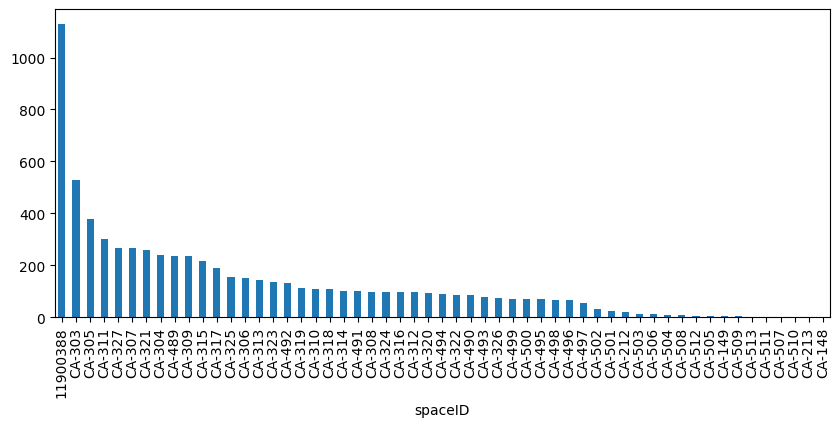

In [3]:
#충전소 분포 시각화
print(df['spaceID'].unique())
df['spaceID'].value_counts().plot(kind='bar', figsize=(10, 4))

#### EVSE 상태(State)
- Available	충전기 사용 가능 상태 (idle)
- Preparing	인증, 설정, 케이블 연결 중
- Charging	실제로 전력이 공급되고 있는 중
- SuspendedEVSE	충전기(EVSE)의 사유로 충전이 일시 중단됨 (예: 전력 제한)
- SuspendedEV	차량(EV) 쪽 사유로 충전이 일시 중단됨 (예: 충전 중단 요청)
- Finishing	충전 완료됨, 아직 차량이 물리적으로 연결됨
- Faulted	충전기 오류 상태 (사용 불가)
##### Available60% Finishing30% Faulted10% 로 만들예정

In [4]:
#전처리 테이블 생성
sort = df[['connectionTime', 'doneChargingTime','kWhDelivered','kWhRequested','WhPerMile','milesRequested','requestedDeparture','disconnectTime']].copy()
sort[['disconnectReasone','EVESstatus','StationId','EVESID','EVESTYPE']] = None
sort

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
0,2019-11-01 18:11:18+00:00,2019-11-02 01:16:41+00:00,14.101,24.0,400.0,60.0,2019-11-02 01:34:18+00:00,2019-11-02 02:55:36+00:00,None,None,None,None,None
1,2019-11-01 18:30:34+00:00,2019-11-01 22:15:39+00:00,6.962,15.0,375.0,40.0,2019-11-02 00:48:34+00:00,2019-11-01 22:15:42+00:00,None,None,None,None,None
2,2019-11-01 18:55:24+00:00,2019-11-01 19:33:12+00:00,2.394,36.0,400.0,90.0,2019-11-02 00:06:24+00:00,2019-11-01 19:33:16+00:00,None,None,None,None,None
3,2019-11-01 19:10:30+00:00,2019-11-01 20:15:26+00:00,2.160,16.0,400.0,40.0,2019-11-02 00:01:30+00:00,2019-11-02 05:12:26+00:00,None,None,None,None,None
4,2019-11-01 19:44:41+00:00,2019-11-01 22:20:49+00:00,6.756,8.0,400.0,20.0,2019-11-01 20:44:41+00:00,2019-11-01 23:22:16+00:00,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,2021-09-13 21:12:53+00:00,2021-09-13 21:41:31+00:00,2.285,28.6,286.0,100.0,2021-09-14 05:12:53+00:00,2021-09-14 00:25:36+00:00,None,None,None,None,None
6901,2021-09-13 21:17:04+00:00,2021-09-13 23:18:07+00:00,6.715,11.5,460.0,25.0,2021-09-13 23:47:04+00:00,2021-09-14 01:01:49+00:00,None,None,None,None,None
6902,2021-09-13 22:33:07+00:00,NaT,17.720,30.0,300.0,100.0,2021-09-14 03:21:07+00:00,2021-09-13 23:06:55+00:00,None,None,None,None,None
6903,2021-09-13 23:11:12+00:00,2021-09-14 00:13:35+00:00,2.018,5.8,290.0,20.0,2021-09-14 01:11:12+00:00,2021-09-14 01:43:11+00:00,None,None,None,None,None


In [5]:
sort.columns

Index(['connectionTime', 'doneChargingTime', 'kWhDelivered', 'kWhRequested',
       'WhPerMile', 'milesRequested', 'requestedDeparture', 'disconnectTime',
       'disconnectReasone', 'EVESstatus', 'StationId', 'EVESID', 'EVESTYPE'],
      dtype='object')

In [6]:
#충전기에 꼽았지만 충전을 요청하지 않은 경우 결측치 0처리
sort[['kWhRequested','WhPerMile','milesRequested']] = sort[['kWhRequested','WhPerMile','milesRequested']].fillna(0)

In [7]:
#출발 예정시간 없음  - 분석 결과 = 충전 요청이 없음  - 처리 = 충전량 이상치 3건 33, 46, 24 제거
sort = sort.drop(index=[5158,4684,5924]) #충전량 이상치 3건 33, 46, 24 제거
sort[sort[['requestedDeparture']].isna().any(axis=1)]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
5,2019-11-01 19:50:43+00:00,2019-11-01 23:47:56+00:00,0.878,0.0,0.0,0.0,NaT,2019-11-02 00:06:10+00:00,None,None,None,None,None
8,2019-11-01 20:56:34+00:00,2019-11-01 21:19:56+00:00,0.625,0.0,0.0,0.0,NaT,2019-11-01 21:19:59+00:00,None,None,None,None,None
17,2019-11-02 02:40:18+00:00,2019-11-02 03:10:58+00:00,0.891,0.0,0.0,0.0,NaT,2019-11-02 03:53:01+00:00,None,None,None,None,None
19,2019-11-02 16:27:08+00:00,2019-11-02 16:57:36+00:00,0.846,0.0,0.0,0.0,NaT,2019-11-02 18:00:43+00:00,None,None,None,None,None
21,2019-11-02 17:13:11+00:00,2019-11-02 17:43:31+00:00,0.881,0.0,0.0,0.0,NaT,2019-11-02 20:06:46+00:00,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2021-09-10 02:29:25+00:00,2021-09-10 05:03:33+00:00,0.907,0.0,0.0,0.0,NaT,2021-09-10 05:24:15+00:00,None,None,None,None,None
6809,2021-09-10 02:53:50+00:00,2021-09-10 03:11:18+00:00,0.501,0.0,0.0,0.0,NaT,2021-09-10 03:11:24+00:00,None,None,None,None,None
6841,2021-09-10 23:03:07+00:00,2021-09-11 01:35:38+00:00,0.904,0.0,0.0,0.0,NaT,2021-09-11 04:28:38+00:00,None,None,None,None,None
6848,2021-09-11 03:03:40+00:00,2021-09-11 03:34:15+00:00,0.902,0.0,0.0,0.0,NaT,2021-09-11 04:18:40+00:00,None,None,None,None,None


In [8]:
# 연결 시간 5분 이하
time_diff = sort['disconnectTime']-sort['connectionTime']
less_5min = (time_diff<pd.Timedelta(minutes=5))
nodonetime = sort[['doneChargingTime']].isna().all(axis=1)
donetime = sort[['doneChargingTime']].notna().all(axis=1)
m1 = donetime&less_5min
m2 = nodonetime&less_5min 
# sort.loc[m1,'disconnectReasone'] = 'EVDisconnected'
# sort.loc[m1,'EVESstatus'] = 'Available'
# sort.loc[m2,'disconnectReasone'] = 'EVDisconnected'
# sort.loc[m2,'EVESstatus'] = 'Available'
sort[less_5min]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
3831,2020-12-27 05:24:39+00:00,NaT,2.287,29.00,290.0,100.0,2020-12-27 13:24:39+00:00,2020-12-27 05:28:45+00:00,None,None,None,None,None
3922,2021-01-10 03:45:35+00:00,NaT,1.845,63.00,630.0,100.0,2021-01-10 11:45:35+00:00,2021-01-10 03:49:18+00:00,None,None,None,None,None
4256,2021-03-06 02:36:28+00:00,2021-03-06 02:40:59+00:00,0.512,100.62,258.0,390.0,2021-03-06 15:00:28+00:00,2021-03-06 02:41:08+00:00,None,None,None,None,None
4307,2021-03-13 17:05:28+00:00,NaT,0.848,27.90,279.0,100.0,2021-03-14 01:13:28+00:00,2021-03-13 17:07:36+00:00,None,None,None,None,None
4325,2021-03-15 23:46:44+00:00,NaT,0.671,63.00,630.0,100.0,2021-03-16 07:46:44+00:00,2021-03-15 23:49:20+00:00,None,None,None,None,None
4517,2021-04-04 19:07:08+00:00,NaT,1.812,27.90,279.0,100.0,2021-04-05 03:15:08+00:00,2021-04-04 19:10:12+00:00,None,None,None,None,None
5081,2021-05-27 14:15:08+00:00,NaT,2.522,75.00,375.0,200.0,2021-05-27 23:51:08+00:00,2021-05-27 14:20:06+00:00,None,None,None,None,None
5177,2021-06-04 19:07:33+00:00,NaT,1.230,27.90,279.0,100.0,2021-06-05 03:15:33+00:00,2021-06-04 19:09:42+00:00,None,None,None,None,None
5349,2021-06-17 03:36:33+00:00,NaT,2.164,9.57,319.0,30.0,2021-06-17 05:31:33+00:00,2021-06-17 03:40:14+00:00,None,None,None,None,None
5607,2021-07-03 21:07:35+00:00,NaT,2.696,31.46,286.0,110.0,2021-07-04 02:24:35+00:00,2021-07-03 21:11:52+00:00,None,None,None,None,None


In [9]:
#출발 예정시간 없고 충전완료시간 없음 - 분석결과 = 충전요청 없음 
mask1 = sort[['doneChargingTime', 'requestedDeparture']].isna().all(axis=1)
# sort.loc[mask1, 'doneChargingTime'] = sort.loc[mask1, 'disconnectTime']
time_diff = sort['disconnectTime']-sort['connectionTime']
same_day = (sort['disconnectTime'].dt.date == sort['connectionTime'].dt.date)
less_5min = (time_diff<pd.Timedelta(minutes=5))
sort[mask1]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
1381,2019-12-30 18:09:38+00:00,NaT,0.925,0.0,0.0,0.0,NaT,2019-12-30 19:37:50+00:00,None,None,None,None,None
1608,2020-01-11 16:36:16+00:00,NaT,0.980,0.0,0.0,0.0,NaT,2020-01-11 22:53:20+00:00,None,None,None,None,None
1615,2020-01-12 17:05:48+00:00,NaT,0.675,0.0,0.0,0.0,NaT,2020-01-12 17:28:19+00:00,None,None,None,None,None
1987,2020-01-24 16:01:14+00:00,NaT,0.848,0.0,0.0,0.0,NaT,2020-01-24 18:15:33+00:00,None,None,None,None,None
2003,2020-01-24 18:51:25+00:00,NaT,0.838,0.0,0.0,0.0,NaT,2020-01-24 20:54:14+00:00,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,2021-08-11 14:35:44+00:00,NaT,0.883,0.0,0.0,0.0,NaT,2021-08-11 17:12:26+00:00,None,None,None,None,None
6237,2021-08-12 18:03:55+00:00,NaT,0.854,0.0,0.0,0.0,NaT,2021-08-12 23:12:23+00:00,None,None,None,None,None
6405,2021-08-21 01:02:04+00:00,NaT,0.897,0.0,0.0,0.0,NaT,2021-08-21 02:09:26+00:00,None,None,None,None,None
6634,2021-09-01 21:00:17+00:00,NaT,0.895,0.0,0.0,0.0,NaT,2021-09-01 22:50:46+00:00,None,None,None,None,None


In [10]:
sort[sort[['doneChargingTime']].isna().any(axis=1)]

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
1380,2019-12-30 17:43:48+00:00,NaT,5.814,8.0,400.0,20.0,2019-12-30 18:13:48+00:00,2019-12-30 19:47:48+00:00,None,None,None,None,None
1381,2019-12-30 18:09:38+00:00,NaT,0.925,0.0,0.0,0.0,NaT,2019-12-30 19:37:50+00:00,None,None,None,None,None
1382,2019-12-30 18:55:22+00:00,NaT,13.440,21.0,420.0,50.0,2019-12-30 23:42:22+00:00,2019-12-30 21:05:28+00:00,None,None,None,None,None
1607,2020-01-11 14:27:47+00:00,NaT,15.707,32.0,400.0,80.0,2020-01-12 01:05:47+00:00,2020-01-11 18:35:08+00:00,None,None,None,None,None
1608,2020-01-11 16:36:16+00:00,NaT,0.980,0.0,0.0,0.0,NaT,2020-01-11 22:53:20+00:00,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,2021-09-13 06:31:02+00:00,NaT,44.996,18.5,370.0,50.0,2021-09-13 08:55:02+00:00,2021-09-13 08:00:26+00:00,None,None,None,None,None
6894,2021-09-13 18:04:33+00:00,NaT,19.704,29.9,299.0,100.0,2021-09-14 02:04:33+00:00,2021-09-13 18:31:32+00:00,None,None,None,None,None
6899,2021-09-13 20:26:50+00:00,NaT,49.136,25.9,370.0,70.0,2021-09-14 04:26:50+00:00,2021-09-13 21:56:03+00:00,None,None,None,None,None
6902,2021-09-13 22:33:07+00:00,NaT,17.720,30.0,300.0,100.0,2021-09-14 03:21:07+00:00,2021-09-13 23:06:55+00:00,None,None,None,None,None


In [11]:
# Calculate the time difference and get the time part (as timedelta, then convert to seconds/hours/minutes if needed)
time_diff = sort['disconnectTime'][0] - sort['connectionTime'][0]
# To get the duration as hours, minutes, seconds:
hours, remainder = divmod(time_diff.total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
(time_diff, hours, minutes, seconds, remainder)

(Timedelta('0 days 08:44:18'), 8.0, 44.0, 18.0, 2658.0)

In [12]:
# datetime → timestamp + 결측은 0으로
sort['requestedDeparture_ts'] = sort['requestedDeparture'].apply(
    lambda x: int(x.timestamp()) if isinstance(x, pd.Timestamp) else 0
).astype('int64')
sort

,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE,requestedDeparture_ts
0,2019-11-01 18:11:18+00:00,2019-11-02 01:16:41+00:00,14.101,24.0,400.0,60.0,2019-11-02 01:34:18+00:00,2019-11-02 02:55:36+00:00,None,None,None,None,None,1572658458
1,2019-11-01 18:30:34+00:00,2019-11-01 22:15:39+00:00,6.962,15.0,375.0,40.0,2019-11-02 00:48:34+00:00,2019-11-01 22:15:42+00:00,None,None,None,None,None,1572655714
2,2019-11-01 18:55:24+00:00,2019-11-01 19:33:12+00:00,2.394,36.0,400.0,90.0,2019-11-02 00:06:24+00:00,2019-11-01 19:33:16+00:00,None,None,None,None,None,1572653184
3,2019-11-01 19:10:30+00:00,2019-11-01 20:15:26+00:00,2.160,16.0,400.0,40.0,2019-11-02 00:01:30+00:00,2019-11-02 05:12:26+00:00,None,None,None,None,None,1572652890
4,2019-11-01 19:44:41+00:00,2019-11-01 22:20:49+00:00,6.756,8.0,400.0,20.0,2019-11-01 20:44:41+00:00,2019-11-01 23:22:16+00:00,None,None,None,None,None,1572641081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,2021-09-13 21:12:53+00:00,2021-09-13 21:41:31+00:00,2.285,28.6,286.0,100.0,2021-09-14 05:12:53+00:00,2021-09-14 00:25:36+00:00,None,None,None,None,None,1631596373
6901,2021-09-13 21:17:04+00:00,2021-09-13 23:18:07+00:00,6.715,11.5,460.0,25.0,2021-09-13 23:47:04+00:00,2021-09-14 01:01:49+00:00,None,None,None,None,None,1631576824
6902,2021-09-13 22:33:07+00:00,NaT,17.720,30.0,300.0,100.0,2021-09-14 03:21:07+00:00,2021-09-13 23:06:55+00:00,None,None,None,None,None,1631589667
6903,2021-09-13 23:11:12+00:00,2021-09-14 00:13:35+00:00,2.018,5.8,290.0,20.0,2021-09-14 01:11:12+00:00,2021-09-14 01:43:11+00:00,None,None,None,None,None,1631581872


In [13]:
# Re-import required packages after code execution state reset
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

n = 1000  # number of rows
base_time = datetime(2019, 11, 1)

# EVSE 관련 정보
station_ids = ["ST01", "ST02", "ST03"]
ev_ids = {
    "ST01": [f"ST01-EV{str(i).zfill(2)}" for i in range(1, 6)],
    "ST02": [f"ST02-EV{str(i).zfill(2)}" for i in range(1, 4)],
    "ST03": [f"ST03-EV{str(i).zfill(2)}" for i in range(1, 3)],
}
ev_type_choices = ["완속", "중속", "급속"]

# OCPP 기반 disconnectReason 매핑
reason_map = {
    "Available": ["EVDisconnected", "Local", "EnergyLimitReached", "PowerLimitReached"],
    "Faulted": ["EmergencyStop", "Faulted", "Other"],
    "Finishing": [None]
}

data = []

for _ in range(n):
    conn_time = base_time + timedelta(minutes=random.randint(0, 60*24*60))
    ev_type = random.choice(ev_type_choices)
    station_id = random.choice(station_ids)
    ev_id = random.choice(ev_ids[station_id])

    kwh_requested = round(random.choice([0.0] * 2 + [random.uniform(5, 80)] * 8), 2)

    if kwh_requested == 0:
        kwh_delivered = round(random.uniform(0.0, 1.0), 2)
        wh_per_mile = 0.0
        miles_requested = 0.0
    else:
        dist = random.choice([
            np.random.beta(1, 3),  # 낮음
            np.random.beta(2, 2),  # 보통
            np.random.beta(3, 1)   # 많음
        ])
        dist = min(dist, 1.2)
        kwh_delivered = round(kwh_requested * dist, 2)
        wh_per_mile = round(random.uniform(180, 400), 2)
        miles_requested = round((kwh_requested * 1000) / wh_per_mile, 1)

    done_time, disconnect_time, requested_departure = None, None, None
    evse_status = None
    disconnect_reason = None

    scenario = random.choices(
        population=[
            "completed_disconnect", "completed_still_connected",
            "faulted_disconnected", "faulted_connected",
            "connected_only", "user_cancel",
            "auto_topup", "test_mode"
        ],
        weights=[0.3, 0.15, 0.1, 0.1, 0.1, 0.05, 0.15, 0.05],
        k=1
    )[0]

    if scenario == "completed_disconnect":
        done_time = conn_time + timedelta(hours=random.uniform(0.5, 6))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 30))
        evse_status = "Available"
        disconnect_reason = random.choice(reason_map["Available"])

    elif scenario == "completed_still_connected":
        done_time = conn_time + timedelta(hours=random.uniform(0.5, 6))
        evse_status = "Finishing"

    elif scenario == "faulted_disconnected":
        done_time = conn_time + timedelta(hours=random.uniform(0.1, 2))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 30))
        evse_status = "Faulted"
        disconnect_reason = random.choice(reason_map["Faulted"])

    elif scenario == "faulted_connected":
        done_time = conn_time + timedelta(hours=random.uniform(0.1, 2))
        evse_status = "Faulted"

    elif scenario == "connected_only":
        evse_status = "Finishing"

    elif scenario == "user_cancel":
        disconnect_time = conn_time + timedelta(minutes=random.randint(1, 15))
        evse_status = "Available"
        disconnect_reason = "EVDisconnected"
        kwh_requested = 0.0
        kwh_delivered = 0.0
        wh_per_mile = 0.0
        miles_requested = 0.0

    elif scenario == "auto_topup":
        kwh_requested = 0.0
        kwh_delivered = round(random.uniform(1, 2), 2)
        done_time = conn_time + timedelta(minutes=random.randint(10, 30))
        disconnect_time = done_time + timedelta(minutes=random.randint(1, 10))
        evse_status = "Available"
        disconnect_reason = "PowerLimitReached"
        wh_per_mile = round(random.uniform(180, 400), 2)
        miles_requested = round((kwh_delivered * 1000) / wh_per_mile, 1)

    elif scenario == "test_mode":
        kwh_requested = 0.0
        kwh_delivered = round(random.uniform(0.1, 0.5), 2)
        disconnect_time = conn_time + timedelta(minutes=random.randint(1, 5))
        evse_status = "Available"
        disconnect_reason = "Other"
        wh_per_mile = 0.0
        miles_requested = 0.0

    if disconnect_time is None:
        disconnect_reason = None

    if random.random() < 0.2:
        requested_departure = None
    else:
        requested_departure = conn_time + timedelta(hours=random.uniform(1, 10))

    row = {
        'connectionTime': conn_time.replace(microsecond=0),
        'doneChargingTime': done_time.replace(microsecond=0) if done_time else None,
        'kWhDelivered': kwh_delivered,
        'kWhRequested': kwh_requested,
        'WhPerMile': wh_per_mile,
        'milesRequested': miles_requested,
        'requestedDeparture': requested_departure.replace(microsecond=0) if requested_departure else None,
        'disconnectTime': disconnect_time.replace(microsecond=0) if disconnect_time else None,
        'disconnectReasone': disconnect_reason,
        'EVESstatus': evse_status,
        'StationId': station_id,
        'EVESID': ev_id,
        'EVESTYPE': ev_type
    }
    data.append(row)

df_final = pd.DataFrame(data)
df_final



,connectionTime,doneChargingTime,kWhDelivered,kWhRequested,WhPerMile,milesRequested,requestedDeparture,disconnectTime,disconnectReasone,EVESstatus,StationId,EVESID,EVESTYPE
0,2019-12-29 04:50:00,NaT,13.37,23.37,202.55,115.4,2019-12-29 11:08:51,NaT,None,Finishing,ST01,ST01-EV03,완속
1,2019-11-03 21:25:00,NaT,11.10,22.45,303.47,74.0,2019-11-04 02:11:32,NaT,None,Finishing,ST01,ST01-EV02,완속
2,2019-12-11 21:18:00,2019-12-11 22:59:03,58.65,61.91,272.98,226.8,NaT,2019-12-11 23:24:03,EnergyLimitReached,Available,ST02,ST02-EV01,급속
3,2019-12-05 13:57:00,2019-12-05 15:53:56,0.73,0.00,0.00,0.0,2019-12-05 22:24:52,2019-12-05 16:06:56,EmergencyStop,Faulted,ST02,ST02-EV02,완속
4,2019-12-27 07:10:00,NaT,0.00,0.00,0.00,0.0,2019-12-27 15:57:54,2019-12-27 07:12:00,EVDisconnected,Available,ST03,ST03-EV01,중속
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-11-18 09:12:00,2019-11-18 10:46:18,0.20,0.00,0.00,0.0,2019-11-18 13:09:21,NaT,None,Finishing,ST02,ST02-EV01,중속
996,2019-12-04 13:48:00,2019-12-04 14:39:24,0.65,0.00,0.00,0.0,2019-12-04 21:08:18,NaT,None,Faulted,ST03,ST03-EV01,중속
997,2019-11-25 22:56:00,2019-11-25 23:55:58,50.39,66.75,319.09,209.2,2019-11-26 07:12:00,2019-11-26 00:23:58,Other,Faulted,ST01,ST01-EV05,급속
998,2019-11-04 11:26:00,2019-11-04 11:49:00,1.13,0.00,192.33,5.9,2019-11-04 12:59:39,2019-11-04 11:51:00,PowerLimitReached,Available,ST01,ST01-EV05,중속


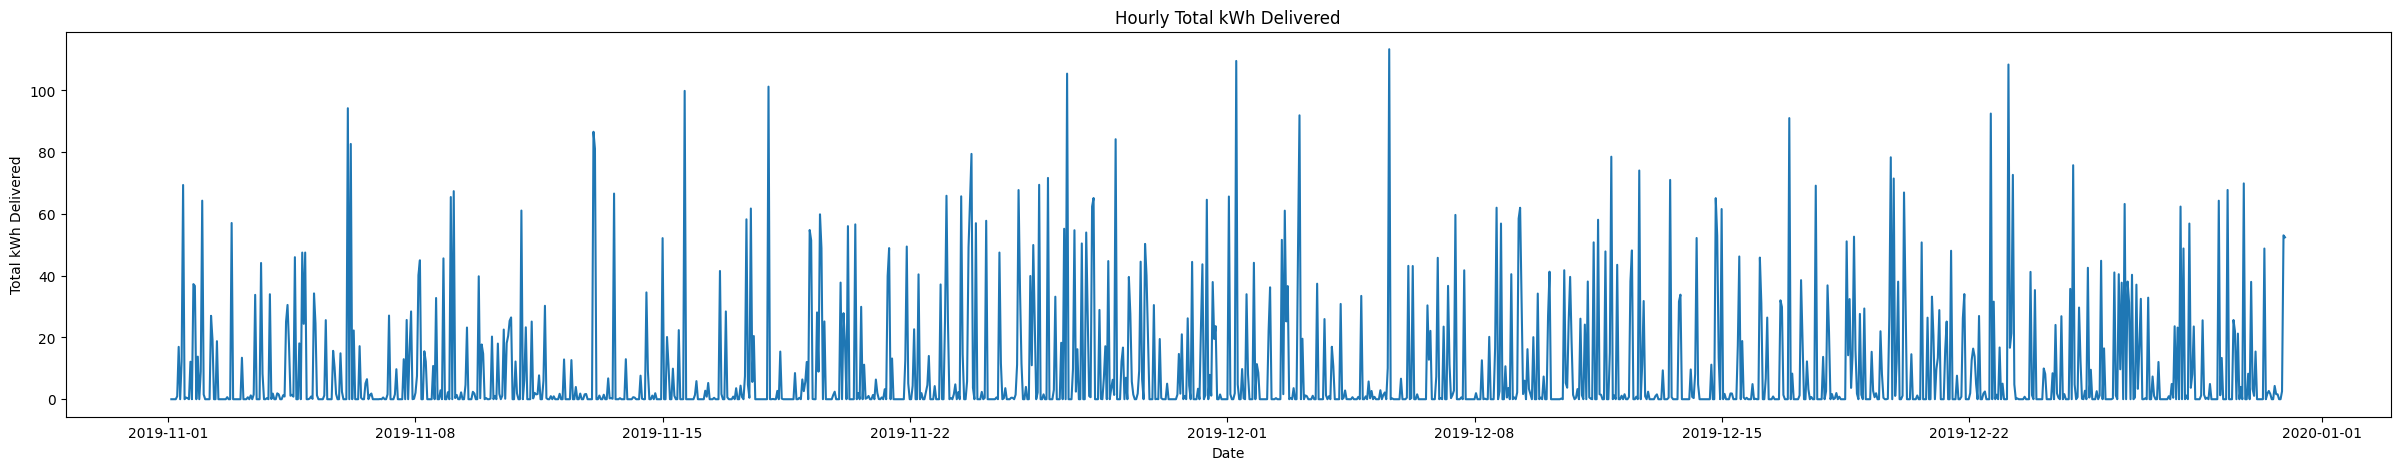

In [ ]:
import matplotlib.pyplot as plt

# Set connectionTime as index for resampling
hourly_kwh = df_final.set_index('connectionTime')['kWhDelivered'].resample('1h').sum()

plt.figure(figsize=(30,5))
plt.plot(hourly_kwh.index, hourly_kwh)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Hourly Total kWh Delivered')
plt.show()

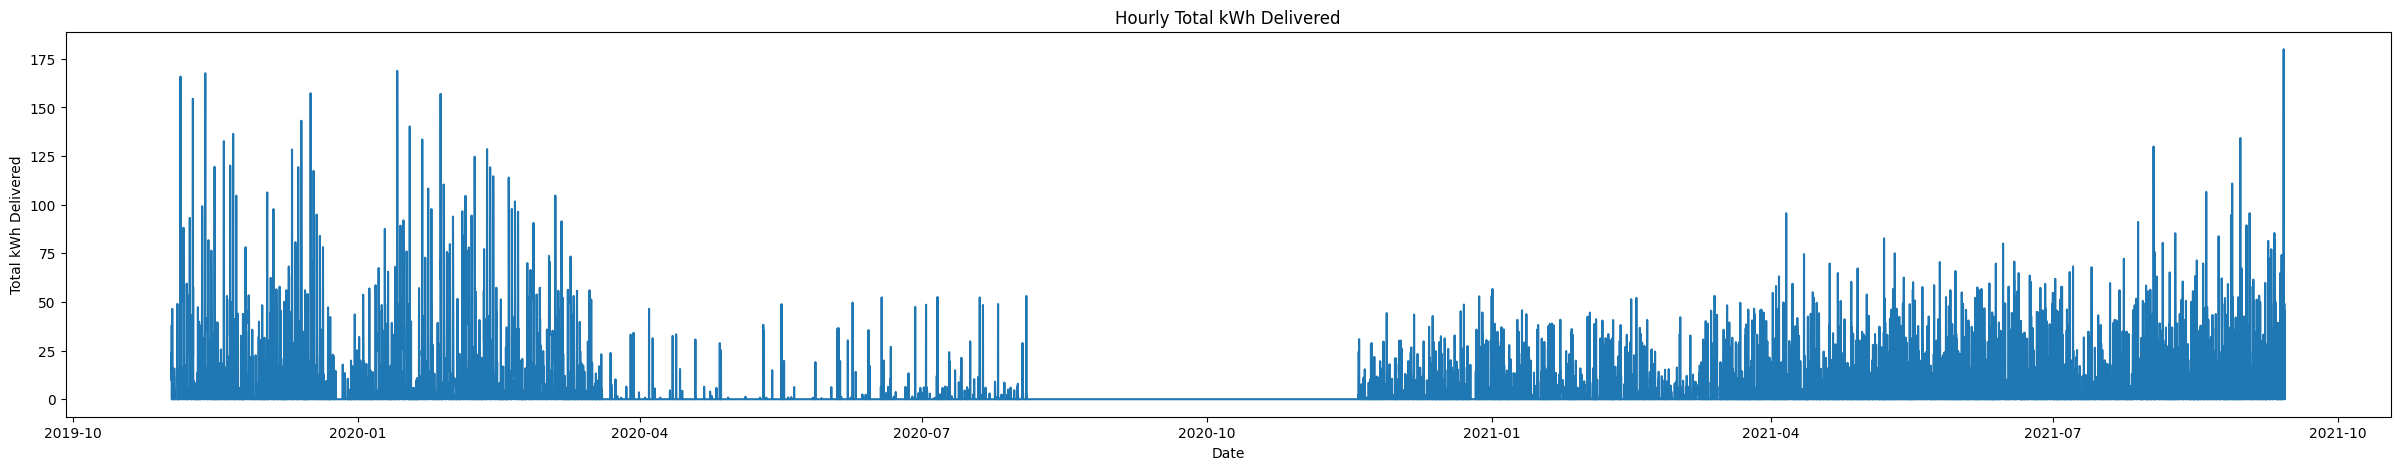

In [ ]:


# Set connectionTime as index for resampling
hourly_kwh = df.set_index('connectionTime')['kWhDelivered'].resample('1h').sum()

plt.figure(figsize=(30,5))
plt.plot(hourly_kwh.index, hourly_kwh)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Hourly Total kWh Delivered')
plt.show()

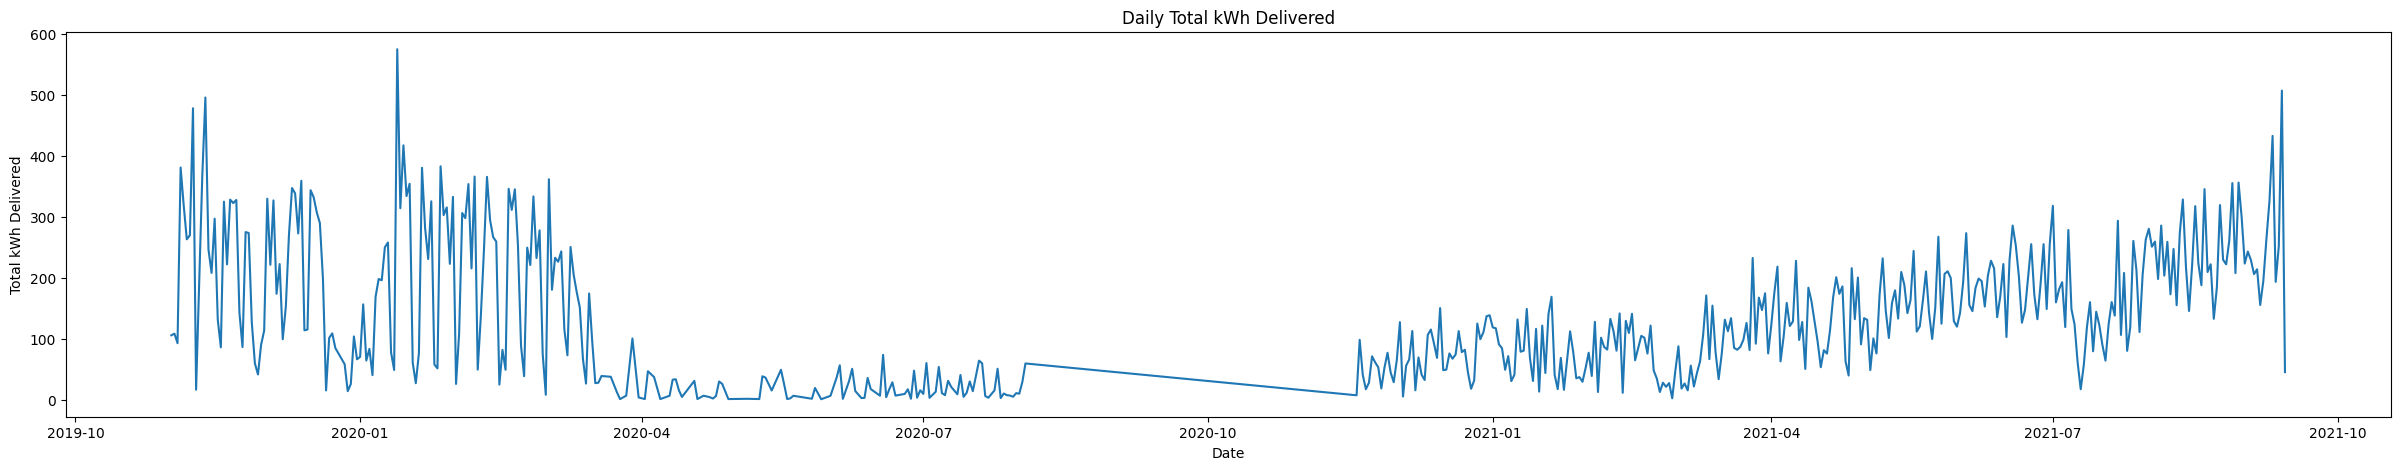

In [15]:
import matplotlib.pyplot as plt

# Group by date and sum kWh delivered per day
daily_kwh = df.groupby(df['connectionTime'].dt.date)['kWhDelivered'].sum()

plt.figure(figsize=(30,5))
plt.plot(daily_kwh.index, daily_kwh.values)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Daily Total kWh Delivered')
plt.show()